## Tensor and operations

In [1]:
import tensorflow as tf

In [2]:
print(tf.add(1, 2))
print(tf.add([1, 2], [3, 4]))
print(tf.square(5))
print(tf.reduce_sum([1, 2, 3]))

# operation overloading
print(tf.square(2) + tf.square(3))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)


In [3]:
x = tf.matmul([[1]], [[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[2 3]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


In [4]:
import numpy as np

ndarray = np.ones([3, 3])

# TensorFlow operation automatically converts the numpy array into a tensor.
tensor = tf.multiply(ndarray, 42)
print(tensor)

# Numpy to Tensor, Automatically
print(np.add(tensor, 1))

print(tensor.numpy())

tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


In [11]:
x = tf.random.uniform([3, 3])

print(tf.test.is_gpu_available())
print(x.device.endswith('GPU:0'))

True
True


In [16]:
import time

def time_matmul(x):
    start = time.time()
    for loop in range(1000):
        tf.matmul(x, x)
        
    result = time.time() - start
    print("1000 loops: {:0.2f}ms".format(1000*result))
    
with tf.device("CPU:0"):
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("CPU:0")
    time_matmul(x)
    
with tf.device("GPU:0"):
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

1000 loops: 3020.79ms
1000 loops: 161.56ms


In [17]:
ds_tensors = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6])

import tempfile
_, filename = tempfile.mkstemp()

with open(filename, 'w') as f:
    f.write("""Line 1
Line 2
Line 3
""")
    
ds_file = tf.data.TextLineDataset(filename)

In [18]:
ds_tensors = ds_tensors.map(tf.square).shuffle(2).batch(2)
ds_file = ds_file.batch(2)

In [19]:
print('ds_tensors element:')
for x in ds_tensors:
    print(x)
    
print('\nds_file element:')
for x in ds_file:
    print(x)

ds_tensors element:
tf.Tensor([1 4], shape=(2,), dtype=int32)
tf.Tensor([ 9 25], shape=(2,), dtype=int32)
tf.Tensor([36 16], shape=(2,), dtype=int32)

ds_file element:
tf.Tensor([b'Line 1' b'Line 2'], shape=(2,), dtype=string)
tf.Tensor([b'Line 3'], shape=(1,), dtype=string)


## Custom layers

In [20]:
import tensorflow as tf

In [21]:
# tf.keras.layers 패키지에서 층은 객체입니다. 층을 구성하려면 간단히 객체를 생성하십시오.
# 대부분의 layer는 첫번째 인수로 출력 차원(크기) 또는 채널을 취합니다.
layer = tf.keras.layers.Dense(100)
# 입력 차원의 수는 층을 처음 실행할 때 유추할 수 있기 때문에 종종 불필요합니다. 
# 일부 복잡한 모델에서는 수동으로 입력 차원의 수를 제공하는것이 유용할 수 있습니다.
layer = tf.keras.layers.Dense(10, input_shape=(None, 5))

In [29]:
layer(tf.zeros([10, 5]))

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [27]:
layer.variables[0].shape, layer.variables[1].shape

(TensorShape([5, 10]), TensorShape([10]))

In [31]:
layer.kernel.shape, layer.bias.shape

(TensorShape([5, 10]), TensorShape([10]))

In [34]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs
        
    def build(self, input_shape):
        self.kernel = self.add_variable("kernel",
                                       shape=[int(input_shape[-1]),
                                             self.num_outputs])
        
    def call(self, input):
        return tf.matmul(input, self.kernel)

In [35]:
layer = MyDenseLayer(10)
print(layer(tf.zeros([10, 5])))
print(layer.trainable_variables)

Instructions for updating:
Please use `layer.add_weight` method instead.
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
[<tf.Variable 'my_dense_layer/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[-0.07604235, -0.00222939, -0.5698631 , -0.20541584, -0.3244319 ,
        -0.17465562, -0.59895396, -0.05391181, -0.5935527 ,  0.2803585 ],
       [ 0.3407476 , -0.34746614, -0.449589  , -0.447424  , -0.08650911,
         0.4958294 ,  0.5459326 , -0.20893916,  0.04224521,  0.33783734],
       [-0.23639938,  0.59632224,  0.36509746, -0.2094036 ,  0.58108634,
         0.04833817,  0.05129111, -0.5717641 ,  0.6321079 ,  0.0760597 ],
       [-0.5787233 ,  0.37279826, -0

In [36]:
class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        filters1, filters2, filters3 = filters
        
        self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
        self.bn2a = tf.keras.layers.BatchNormalization()
        
        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
        self.bn2b = tf.keras.layers.BatchNormalization()
        
        self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
        self.bn2c = tf.keras.layers.BatchNormalization()
        
    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2c(x)
        x = self.bn2c(x, training=training)
        
        x += input_tensor
        return tf.nn.relu(x)

In [38]:
block = ResnetIdentityBlock(1, [1, 2, 3])
print(block(tf.zeros([1, 2, 3, 3])))
print([x.name for x in block.trainable_variables])

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]], shape=(1, 2, 3, 3), dtype=float32)
['resnet_identity_block_1/conv2d_3/kernel:0', 'resnet_identity_block_1/conv2d_3/bias:0', 'resnet_identity_block_1/batch_normalization_3/gamma:0', 'resnet_identity_block_1/batch_normalization_3/beta:0', 'resnet_identity_block_1/conv2d_4/kernel:0', 'resnet_identity_block_1/conv2d_4/bias:0', 'resnet_identity_block_1/batch_normalization_4/gamma:0', 'resnet_identity_block_1/batch_normalization_4/beta:0', 'resnet_identity_block_1/conv2d_5/kernel:0', 'resnet_identity_block_1/conv2d_5/bias:0', 'resnet_identity_block_1/batch_normalization_5/gamma:0', 'resnet_identity_block_1/batch_normalization_5/beta:0']


In [40]:
tf.keras.layers.Conv2D??

In [39]:
my_seq = tf.keras.Sequential([tf.keras.layers.Conv2D(1, (1, 1),
                                                    input_shape=(
                                                        None, None, 3)),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(2, 1,
                                                    padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(3, (1, 1)),
                             tf.keras.layers.BatchNormalization()])
my_seq(tf.zeros([1, 2, 3, 3]))

<tf.Tensor: shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

## Custom training

In [41]:
import tensorflow as tf

In [42]:
x = tf.zeros([10, 10])
x += 2
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [45]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

v.assign(3.0)
assert v.numpy() == 3.0

v.assign(tf.square(v))
assert v.numpy() == 9.0

In [46]:
"""
변수를 사용한 연산은 그래디언트가 계산될 때 자동적으로 추적됩니다. 
임베딩(embedding)을 나타내는 변수의 경우 기본적으로 희소 텐서(sparse tensor)를 
사용하여 업데이트됩니다. 이는 연산과 메모리에 더욱 효율적입니다.

또한 변수를 사용하는 것은 코드를 읽는 독자에게 상태가 변경될 수 있다는 것을 
알려주는 손쉬운 방법입니다.
"""

'\n변수를 사용한 연산은 그래디언트가 계산될 때 자동적으로 추적됩니다. \n임베딩(embedding)을 나타내는 변수의 경우 기본적으로 희소 텐서(sparse tensor)를 \n사용하여 업데이트됩니다. 이는 연산과 메모리에 더욱 효율적입니다.\n\n또한 변수를 사용하는 것은 코드를 읽는 독자에게 상태가 변경될 수 있다는 것을 \n알려주는 손쉬운 방법입니다.\n'

In [47]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
        
    def __call__(self, x):
        return self.W * x + self.b
    
model = Model()

assert model(3.0).numpy() == 15.0

In [48]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [49]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

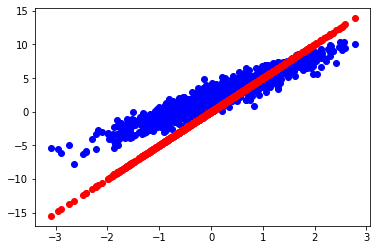

9.151332


In [50]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print(loss(model(inputs), outputs).numpy())

In [51]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

epoch  0: W=5.00 b=0.00, loss=9.15133
epoch  1: W=4.59 b=0.40, loss=6.21964
epoch  2: W=4.26 b=0.71, loss=4.33491
epoch  3: W=4.00 b=0.97, loss=3.12324
epoch  4: W=3.79 b=1.17, loss=2.34427
epoch  5: W=3.62 b=1.34, loss=1.84346
epoch  6: W=3.48 b=1.47, loss=1.52149
epoch  7: W=3.37 b=1.58, loss=1.31449
epoch  8: W=3.29 b=1.66, loss=1.18141
epoch  9: W=3.22 b=1.73, loss=1.09585


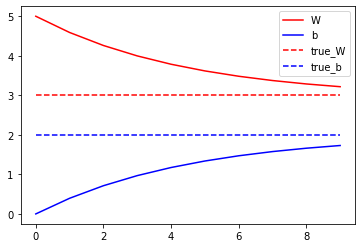

In [52]:
model = Model()

Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model, inputs, outputs, learning_rate=0.1)
    print('epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %(
            epoch, Ws[-1], bs[-1], current_loss))
    
plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true_W', 'true_b'])
plt.show()

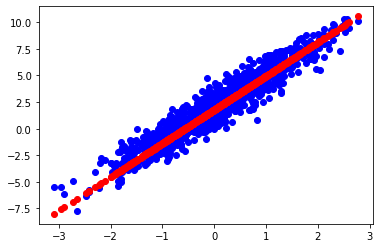

1.0408374


In [53]:
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print(loss(model(inputs), outputs).numpy())

## Custom training: walkthrough

In [54]:
import os

import tensorflow as tf
import matplotlib.pyplot as plt

In [55]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("데이터셋이 복사된 위치: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
데이터셋이 복사된 위치: /root/.keras/datasets/iris_training.csv


In [57]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [58]:
# CSV 파일안에서 컬럼의 순서
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("특성: {}".format(feature_names))
print("레이블: {}".format(label_name))

특성: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
레이블: species


In [59]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [60]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [61]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.2, 6.9, 6.6, 5.7, 5.1, 5.1, 5.2, 5.9, 7. , 5.8, 7.7, 5. , 6.3,
       6.5, 4.9, 5. , 5.5, 5.4, 5.6, 6.2, 4.8, 4.9, 6.3, 7.7, 7.4, 6.6,
       6.4, 6.7, 5.7, 6.5, 4.6, 4.4], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.5, 3.1, 3. , 3.8, 2.5, 3.8, 2.7, 3.2, 3.2, 2.7, 2.6, 3.5, 3.4,
       3. , 3.1, 3.5, 2.6, 3.9, 2.7, 2.8, 3. , 2.5, 2.7, 2.8, 2.8, 2.9,
       2.8, 3. , 2.8, 3.2, 3.2, 3. ], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.5, 5.1, 4.4, 1.7, 3. , 1.6, 3.9, 4.8, 4.7, 5.1, 6.9, 1.3, 5.6,
       5.2, 1.5, 1.6, 4.4, 1.3, 4.2, 4.8, 1.4, 4.5, 4.9, 6.7, 6.1, 4.6,
       5.6, 5. , 4.1, 5.1, 1.4, 1.3], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.2, 2.3, 1.4, 0.3, 1.1, 0.2, 1.4, 1.8, 1.4, 1.9, 2.3, 0.3, 2.4,
       2. , 0.1, 0.6, 1.2, 0.4, 1.3, 1.8, 0.1, 1.7, 1.8, 2. ,

In [67]:
tf.stack(list(features.values()), axis=-1)

<tf.Tensor: shape=(32, 4), dtype=float32, numpy=
array([[5.2, 3.5, 1.5, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [6.6, 3. , 4.4, 1.4],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 2.5, 3. , 1.1],
       [5.1, 3.8, 1.6, 0.2],
       [5.2, 2.7, 3.9, 1.4],
       [5.9, 3.2, 4.8, 1.8],
       [7. , 3.2, 4.7, 1.4],
       [5.8, 2.7, 5.1, 1.9],
       [7.7, 2.6, 6.9, 2.3],
       [5. , 3.5, 1.3, 0.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.5, 3. , 5.2, 2. ],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3.5, 1.6, 0.6],
       [5.5, 2.6, 4.4, 1.2],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.7, 4.2, 1.3],
       [6.2, 2.8, 4.8, 1.8],
       [4.8, 3. , 1.4, 0.1],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.7, 4.9, 1.8],
       [7.7, 2.8, 6.7, 2. ],
       [7.4, 2.8, 6.1, 1.9],
       [6.6, 2.9, 4.6, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [6.7, 3. , 5. , 1.7],
       [5.7, 2.8, 4.1, 1.3],
       [6.5, 3.2, 5.1, 2. ],
       [4.6, 3.2, 1.4, 0.2],
       [4.4, 3. , 1.3, 0.2]], dtype=float32)>

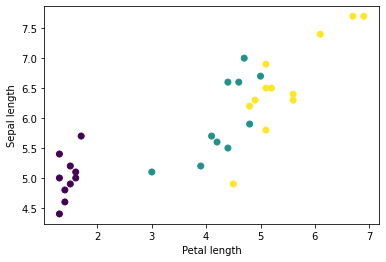

In [62]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [63]:
def pack_features_vector(features, labels):
    """특성들을 단일 배열로 묶습니다."""
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [68]:
train_dataset = train_dataset.map(pack_features_vector)

In [70]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[4.7 3.2 1.6 0.2]
 [5.7 2.8 4.5 1.3]
 [6.7 3.1 4.4 1.4]
 [7.7 2.6 6.9 2.3]
 [6.9 3.2 5.7 2.3]], shape=(5, 4), dtype=float32)


In [72]:
labels

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 1, 2, 2, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 2,
       2, 2, 2, 0, 0, 2, 2, 0, 1, 2], dtype=int32)>

In [96]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4, )),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [78]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-0.731094  , -1.4101319 , -0.6343097 ],
       [-0.56653917, -1.5934764 , -0.5892578 ],
       [-0.6692314 , -1.7319895 , -0.70820224],
       [-0.5967836 , -1.8867018 , -0.71074736],
       [-0.31015217, -1.7669291 , -0.51687324]], dtype=float32)>

In [79]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.38332868, 0.19438773, 0.4222836 ],
       [0.42814827, 0.15332077, 0.41853097],
       [0.4334107 , 0.14974408, 0.41684523],
       [0.4613432 , 0.12700468, 0.41165206],
       [0.48870304, 0.11386096, 0.397436  ]], dtype=float32)>

In [80]:
print("  예측: {}".format(tf.argmax(predictions, axis=1)))
print("레이블: {}".format(labels))

  예측: [2 0 0 0 0 0 0 2 2 0 2 2 2 0 2 0 2 2 0 0 0 0 0 0 0 2 2 0 0 2 0 0]
레이블: [0 1 1 2 2 1 2 0 0 1 1 0 0 2 0 2 0 0 1 1 1 2 2 2 2 0 0 2 2 0 1 2]


In [81]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [83]:
def loss(model, x, y):
    y_ = model(x)
    return loss_object(y_true=y, y_pred=y_)

In [84]:
l = loss(model, features, labels)
print("loss test: {}".format(l))

loss test: 1.1792786121368408


In [85]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [95]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [87]:
loss_value, grads = grad(model, features, labels)

print("단계: {}, 초기 손실: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("단계: {},      손실: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels).numpy()))

단계: 0, 초기 손실: 1.1792786121368408
단계: 1,      손실: 1.8587353229522705


In [97]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    
    for x, y in train_dataset:
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        epoch_loss_avg(loss_value)
        epoch_accuracy(y, model(x))
        
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 50 == 0:
        print("epoch {:03d}: loss: {:.3f}, acc: {:.3%}".format(epoch,
                                                              epoch_loss_avg.result(),
                                                              epoch_accuracy.result()))

epoch 000: loss: 1.319, acc: 35.000%
epoch 050: loss: 0.081, acc: 98.333%
epoch 100: loss: 0.061, acc: 99.167%
epoch 150: loss: 0.048, acc: 98.333%
epoch 200: loss: 0.052, acc: 99.167%


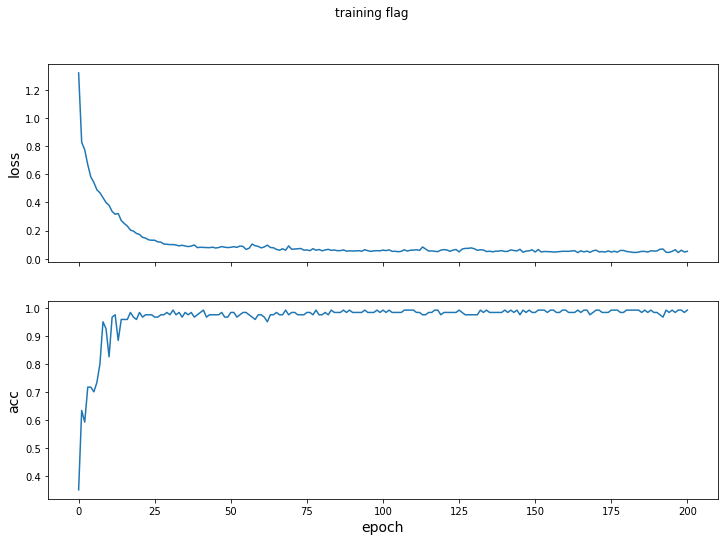

In [99]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('training flag')

axes[0].set_ylabel("loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("acc", fontsize=14)
axes[1].set_xlabel("epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [100]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"
test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [101]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [103]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
    logits = model(x)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)
    
print("테스트 세트 정확도: {:.3%}".format(test_accuracy.result()))

테스트 세트 정확도: 96.667%


In [104]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print("샘플 {} 예측: {} ({:4.1f}%)".format(i, name, 100*p))

샘플 0 예측: Iris setosa (99.9%)
샘플 1 예측: Iris versicolor (99.9%)
샘플 2 예측: Iris virginica (99.0%)
